In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data.shape

(158, 12)

In [5]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
nRow, nCol = data.shape
print("The number of countries in the dataset =",nRow)
print("The number of parameters for happiness =",nCol)

The number of countries in the dataset = 158
The number of parameters for happiness = 12


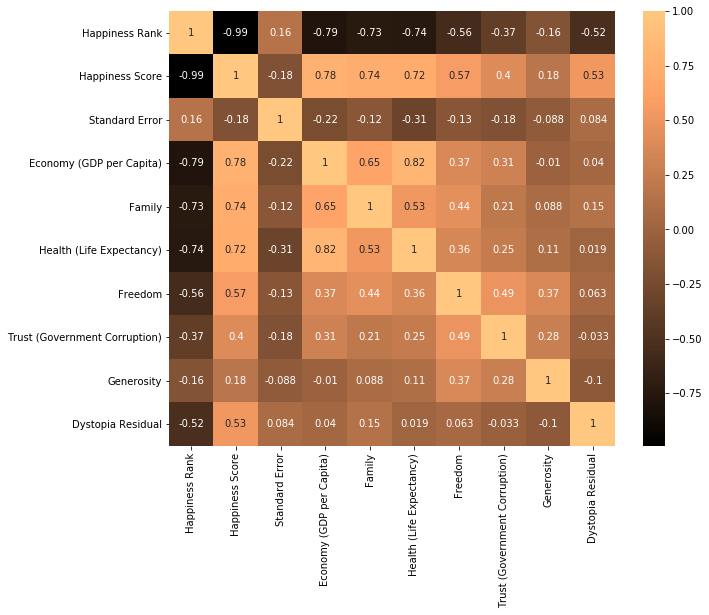

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.corr(),cmap='copper',annot=True)


So from tha above correlation we can make the following conclusion:
- The Happiness score is having high correlation with Economy(GDP per Capita), Family, Health(Life Expectancy),\
  and moderatly correlated with Freedom, Dystopia Residual and Trust(Government Corruption).
- Economy(GDP per Capita) is highly correlated with Health(Life Expectancy).

<Figure size 720x720 with 0 Axes>

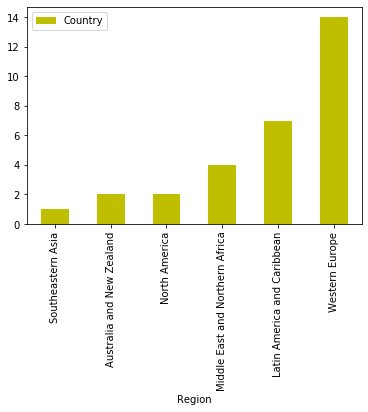

In [9]:
plt.figure(figsize=(10,10))
data.head(30).groupby('Region').agg({'Country':'count'}).sort_values(by='Country').plot(kind='bar',color='y',title='')
plt.show()

From the above plot we can come to the conclusion that most of the country having higher Happiness Score belongs to Western Europe, followed by Latin America and Caribbean

<Figure size 720x360 with 0 Axes>

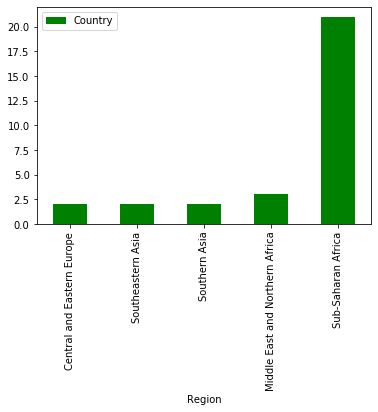

In [10]:
plt.figure(figsize=(10,5))
data.tail(30).groupby('Region').agg({'Country':'count'}).sort_values(by='Country',ascending=True).plot(kind='bar',color='g',title='')
plt.show()

In the above plot We can see that almost 70% of the Countries who had less Happiness Score belongs to Sub-Saharan Africa region


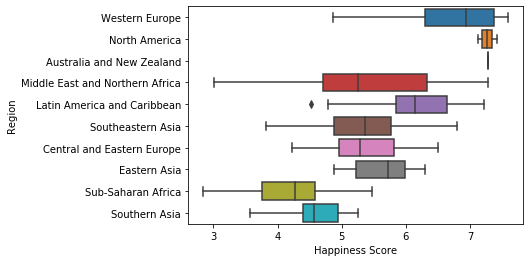

In [11]:
sns.boxplot(data['Happiness Score'], data['Region'])
plt.show()

- From the above plot we get to know that the Happiness Score of the countries belonging to the region "Middle East and        Northern   America" are having wide range of Happiness Score.
- Countries Belonging to the Western Europe are mostly happy.
- Most, almost all the countries from Latin America and Caribbean region have moderately good Happiness Score except one country, which can be seen as outlier.
- Sub-Saharan Africa is the least Happiest Region of all.

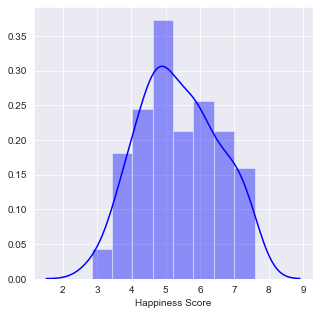

In [12]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.distplot(data['Happiness Score'],kde=True,color='blue',hist=True)

- The Happiness Score is Normally distributed and most of the Countries have the Happiness Score between 5-6. 

In [13]:
data[['Country', 'Generosity']].sort_values(by = 'Generosity',ascending = False).head(10)

,Country,Generosity
128,Myanmar,0.79588
33,Thailand,0.57630
20,United Kingdom,0.51912
36,Malta,0.51752
73,Indonesia,0.51535
90,Somaliland region,0.50318
78,Bhutan,0.47998
6,Netherlands,0.47610
8,New Zealand,0.47501
155,Syria,0.47179


- From the above table we can see that though Myanmar is not having a good Happiness Score but the people are actually more Generous then those Country's People who are much more Happier then them.
- So, Again Generosity and Happiness Score is not really correlated

In [14]:
data[['Country', 'Trust (Government Corruption)']].sort_values(by = 'Trust (Government Corruption)',ascending = False).head(10)

,Country,Trust (Government Corruption)
153,Rwanda,0.55191
27,Qatar,0.52208
23,Singapore,0.49210
2,Denmark,0.48357
7,Sweden,0.43844
8,New Zealand,0.42922
0,Switzerland,0.41978
5,Finland,0.41372
90,Somaliland region,0.39928
19,United Arab Emirates,0.38583


- Top 10 Countries with Trust in Government

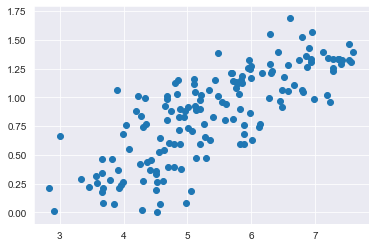

In [15]:
# Happiness Score and Economy are Linerally Distributed
plt.scatter(data['Happiness Score'], data['Economy (GDP per Capita)'])

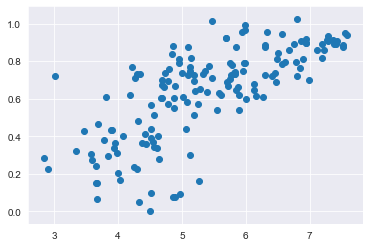

In [16]:
# Happiness Score and Health (Life Expectancy) are also Linerally Distributed
plt.scatter(data['Happiness Score'], data['Health (Life Expectancy)'])

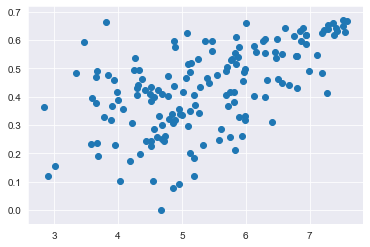

In [17]:
# Happiness Score and Freedom of people are also Linerally Distributed
plt.scatter(data['Happiness Score'], data['Freedom'])

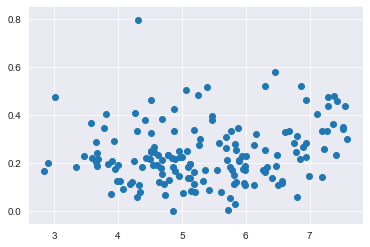

In [18]:
# Happiness Score and Generosity are not that much Linerally Distributed
plt.scatter(data['Happiness Score'], data['Generosity'])

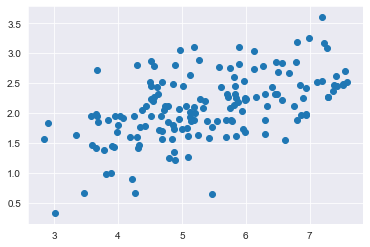

In [19]:
# Happiness Score and Dystopia Residual are also almost Linerally Distributed
plt.scatter(data['Happiness Score'], data['Dystopia Residual'])

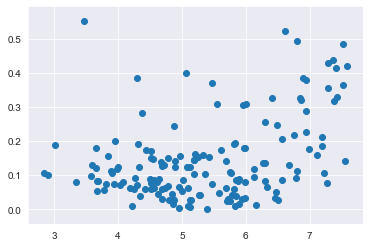

In [20]:
# Happiness Score and Trust in Govt. are moderatley Linerally Distributed
plt.scatter(data['Happiness Score'], data['Trust (Government Corruption)'])

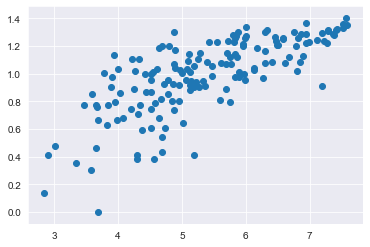

In [21]:
# Happiness Score and Family Satisfaction are also Linerally Distributed
plt.scatter(data['Happiness Score'], data['Family'])

In [22]:
# Feature and Target Variable
X=data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
        'Trust (Government Corruption)','Dystopia Residual']]
y=data['Happiness Score']

In [23]:
# Spliting the model for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
# Building the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr_pred = lr.predict(X_test)
lr_pred

array([4.30689895, 5.98710561, 4.19426044, 2.90453085, 5.05721508,
       6.57407824, 4.89753373, 4.8760068 , 4.94869803, 3.93078591,
       6.90137991, 5.82829366, 6.98259958, 5.54817142, 6.78625343,
       6.50510386, 4.50718067, 4.68555198, 4.9710959 , 5.695315  ,
       3.65506901, 6.93738233, 7.19984324, 7.28401572, 6.48514639,
       5.19231489, 5.8889859 , 3.9556194 , 4.36917273, 3.68084119,
       3.78077004, 5.33248774])

In [26]:
# Cross-Validating
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X_train, y_train, scoring='r2', cv=3)
scores 

array([0.99999993, 0.99999988, 0.99999991])

In [27]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)
